# Problem statement: Online vehicle booking using market segmentation:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
#Importing all libraries and reading dataset:

In [3]:
A = pd.read_csv("C:/Users/Admin/Downloads/sigma_cabs.csv~/sigma_cabs.csv")

In [4]:
A

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131657,T0005908509,11.72,D,1.0,2.74229,A,A,3.28500,0,61.0,47,76,Male,3
131658,T0005908510,74.81,C,7.0,2.81059,C,A,0.44500,0,NaN,63,88,Male,2
131659,T0005908512,40.17,C,10.0,2.99565,B,A,3.33625,0,NaN,48,75,Female,2
131660,T0005908513,46.88,B,4.0,3.04744,A,B,4.15750,1,47.0,54,79,Male,2


In [5]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [6]:
A.isna().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [7]:
A.Cancellation_Last_1Month.value_counts()

0    68687
1    36834
2    16223
3     7142
4     1823
5      668
6      266
7       16
8        3
Name: Cancellation_Last_1Month, dtype: int64

In [8]:
#Created a function "replacer" under ml_txt module.. This function does missing data treatment

In [9]:
from ml_txt import replacer
replacer(A)

In [10]:
A.isna().sum()

Trip_ID                        0
Trip_Distance                  0
Type_of_Cab                    0
Customer_Since_Months          0
Life_Style_Index               0
Confidence_Life_Style_Index    0
Destination_Type               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var1                           0
Var2                           0
Var3                           0
Gender                         0
Surge_Pricing_Type             0
dtype: int64

In [11]:
#Drop unique identity columns and separating data into continous and categorical:

In [12]:
A = A.drop(labels=["Trip_ID"],axis=1)

In [13]:
cat = []
con = []
for i in A.columns:
    if(A[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

In [14]:
cat

['Type_of_Cab', 'Confidence_Life_Style_Index', 'Destination_Type', 'Gender']

In [15]:
con

['Trip_Distance',
 'Customer_Since_Months',
 'Life_Style_Index',
 'Customer_Rating',
 'Cancellation_Last_1Month',
 'Var1',
 'Var2',
 'Var3',
 'Surge_Pricing_Type']

In [16]:
#Data visualizations using chats,plots:

<AxesSubplot:xlabel='Confidence_Life_Style_Index', ylabel='count'>

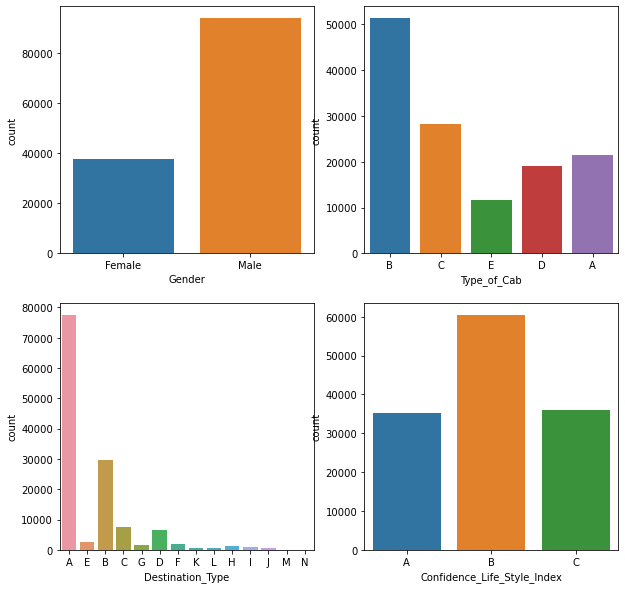

In [17]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sb.countplot(A.Gender)
plt.subplot(2,2,2)
sb.countplot(A.Type_of_Cab)
plt.subplot(2,2,3)
sb.countplot(A.Destination_Type)
plt.subplot(2,2,4)
sb.countplot(A.Confidence_Life_Style_Index)

<AxesSubplot:xlabel='Surge_Pricing_Type', ylabel='Density'>

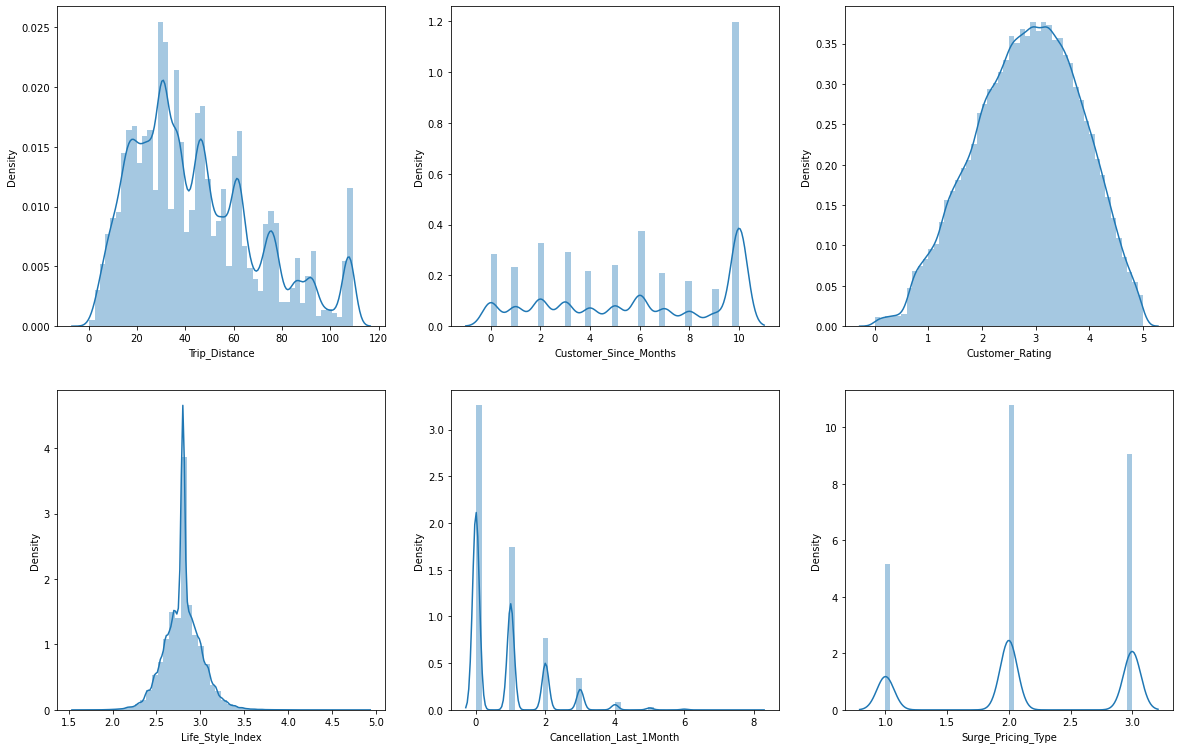

In [18]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sb.distplot(A.Trip_Distance)
plt.subplot(3,3,2)
sb.distplot(A.Customer_Since_Months)
plt.subplot(3,3,3)
sb.distplot(A.Customer_Rating)
plt.subplot(3,3,4)
sb.distplot(A.Life_Style_Index)
plt.subplot(3,3,5)
sb.distplot(A.Cancellation_Last_1Month)
plt.subplot(3,3,6)
sb.distplot(A.Surge_Pricing_Type)

<AxesSubplot:xlabel='Cancellation_Last_1Month', ylabel='count'>

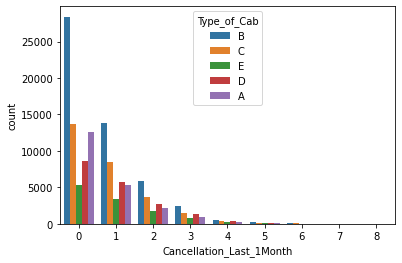

In [19]:
sb.countplot(A.Cancellation_Last_1Month,hue=A.Type_of_Cab)

<AxesSubplot:xlabel='Customer_Rating', ylabel='Type_of_Cab'>

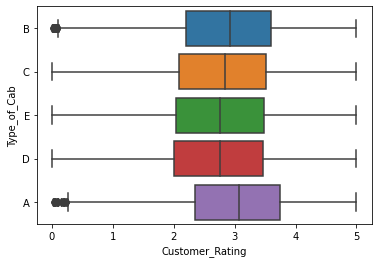

In [20]:
sb.boxplot(A.Customer_Rating,A.Type_of_Cab)

<AxesSubplot:xlabel='Customer_Since_Months', ylabel='count'>

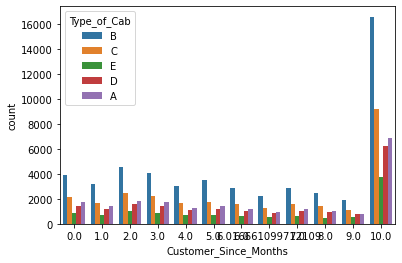

In [21]:
sb.countplot(A.Customer_Since_Months,hue = A.Type_of_Cab)

<AxesSubplot:xlabel='Customer_Since_Months', ylabel='count'>

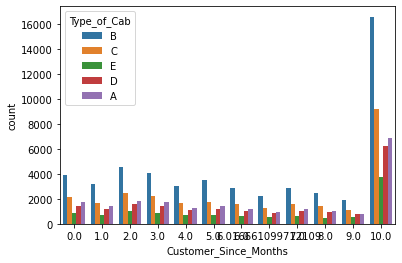

In [22]:
sb.countplot(A.Customer_Since_Months,hue=A.Type_of_Cab)

<AxesSubplot:xlabel='Destination_Type', ylabel='count'>

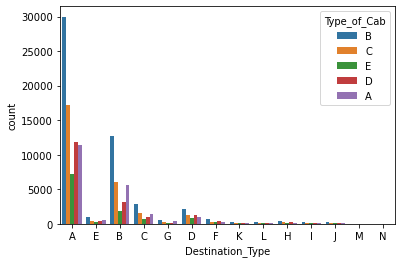

In [23]:
sb.countplot(A.Destination_Type,hue=A.Type_of_Cab)

<AxesSubplot:xlabel='Trip_Distance', ylabel='Type_of_Cab'>

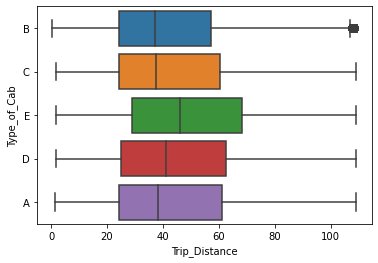

In [24]:
sb.boxplot(A.Trip_Distance, A.Type_of_Cab)

<AxesSubplot:xlabel='Confidence_Life_Style_Index', ylabel='count'>

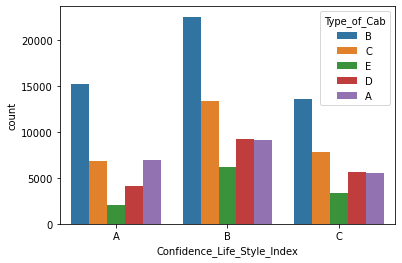

In [25]:
sb.countplot(A.Confidence_Life_Style_Index,hue = A.Type_of_Cab)

<AxesSubplot:xlabel='Surge_Pricing_Type', ylabel='count'>

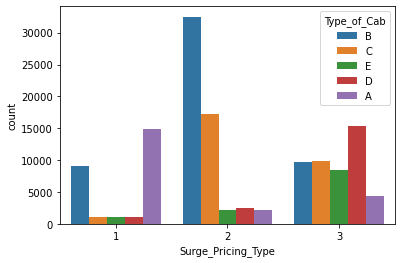

In [26]:
sb.countplot(A.Surge_Pricing_Type,hue = A.Type_of_Cab)

<AxesSubplot:xlabel='Cancellation_Last_1Month', ylabel='count'>

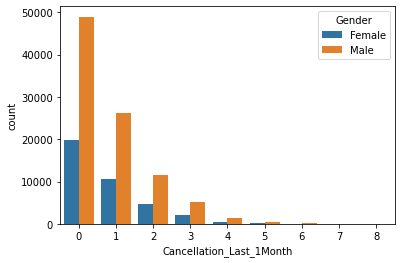

In [27]:
sb.countplot(A.Cancellation_Last_1Month,hue = A.Gender)

<AxesSubplot:xlabel='Gender', ylabel='count'>

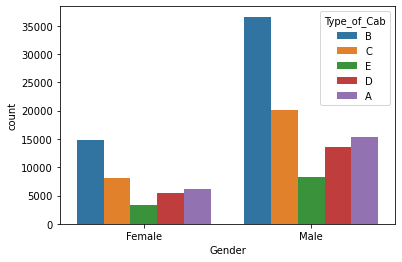

In [28]:
sb.countplot(A.Gender,hue = A.Type_of_Cab)

<AxesSubplot:xlabel='Customer_Rating', ylabel='Gender'>

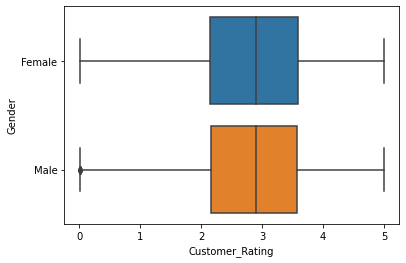

In [29]:
sb.boxplot(A.Customer_Rating,A.Gender)

<AxesSubplot:xlabel='Customer_Since_Months', ylabel='Cancellation_Last_1Month'>

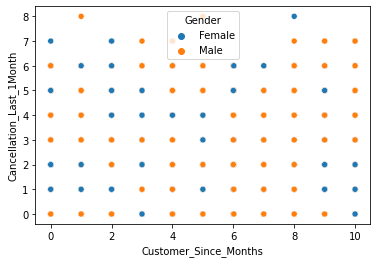

In [30]:
sb.scatterplot(A.Customer_Since_Months,A.Cancellation_Last_1Month,hue=A.Gender)

<AxesSubplot:xlabel='Surge_Pricing_Type', ylabel='count'>

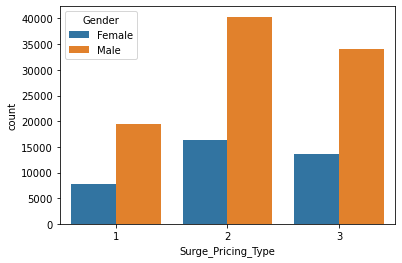

In [31]:
sb.countplot(A.Surge_Pricing_Type,hue = A.Gender)

In [32]:
#Checking correlation between columns using heatmap:

<AxesSubplot:>

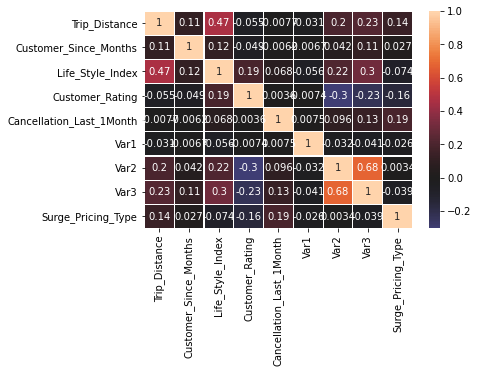

In [33]:
sb.heatmap(A.corr(),annot=True,linewidths=0.2,center=0)

In [34]:
A.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,6.77,B,1.0,2.427690,A,A,3.90500,0,40.000000,46,60,Female,2
1,29.47,B,10.0,2.782450,B,A,3.45000,0,38.000000,56,78,Male,2
2,41.58,B,10.0,2.802064,B,E,3.50125,2,64.202698,56,77,Male,2
3,61.56,C,10.0,2.802064,B,A,3.45375,0,64.202698,52,74,Male,3
4,54.95,C,10.0,3.034530,B,A,3.40250,4,51.000000,49,102,Male,2


In [35]:
#Data Preprocessing: StandardScaler for continous and LabelEncoding for Categorical columns

In [36]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(A[con]),columns=con)

In [37]:
X1.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
0,-1.466568,-1.415378,-1.801959e+00,1.076346,-0.754502,-1.634493,-1.043456,-1.304086,-0.210994
1,-0.577167,1.123841,-9.440728e-02,0.612378,-0.754502,-1.769560,0.962110,0.250555,-0.210994
2,-0.102689,1.123841,3.633778e-14,0.664638,1.173106,0.000000,0.962110,0.164186,-0.210994
3,0.680141,1.123841,3.633778e-14,0.616202,-0.754502,0.000000,0.159884,-0.094921,1.143724
4,0.421157,1.123841,1.118919e+00,0.563942,3.100714,-0.891624,-0.441786,2.323410,-0.210994


In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
A["Type_of_Cab"]=le.fit_transform(A["Type_of_Cab"])
A["Confidence_Life_Style_Index"] =le.fit_transform(A["Confidence_Life_Style_Index"])
A["Destination_Type"]=le.fit_transform(A["Destination_Type"])
A["Gender"]=le.fit_transform(A["Gender"])

In [39]:
A = A[["Type_of_Cab","Destination_Type","Gender","Confidence_Life_Style_Index"]]

In [40]:
A=A.join(X1)

In [41]:
A.head()

,Type_of_Cab,Destination_Type,Gender,Confidence_Life_Style_Index,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
0,1,0,0,0,-1.466568,-1.415378,-1.801959e+00,1.076346,-0.754502,-1.634493,-1.043456,-1.304086,-0.210994
1,1,0,1,1,-0.577167,1.123841,-9.440728e-02,0.612378,-0.754502,-1.769560,0.962110,0.250555,-0.210994
2,1,4,1,1,-0.102689,1.123841,3.633778e-14,0.664638,1.173106,0.000000,0.962110,0.164186,-0.210994
3,2,0,1,1,0.680141,1.123841,3.633778e-14,0.616202,-0.754502,0.000000,0.159884,-0.094921,1.143724
4,2,0,1,1,0.421157,1.123841,1.118919e+00,0.563942,3.100714,-0.891624,-0.441786,2.323410,-0.210994


In [42]:
A.shape

(131662, 13)

In [43]:
A.isna().sum()

Type_of_Cab                    0
Destination_Type               0
Gender                         0
Confidence_Life_Style_Index    0
Trip_Distance                  0
Customer_Since_Months          0
Life_Style_Index               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var1                           0
Var2                           0
Var3                           0
Surge_Pricing_Type             0
dtype: int64

In [44]:
#Forming clusters on various parameters using Kmeans and Hierarchical clustering:[groups customers with similar behaviour in one cluster]

In [45]:
C1 = A[["Trip_Distance","Life_Style_Index"]]

In [46]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
model = km.fit(C1)
model.labels_

array([2, 0, 0, ..., 0, 0, 0])

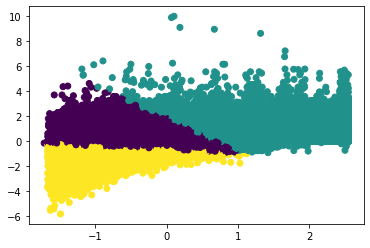

In [47]:
import matplotlib.pyplot as plt
plt.scatter(C1["Trip_Distance"],C1.Life_Style_Index,c=model.labels_)

In [49]:
C1 = A[["Trip_Distance","Life_Style_Index"]][0:50]

In [50]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=4)
model = agc.fit(C1)
model.labels_

array([2, 1, 1, 0, 0, 1, 1, 1, 3, 3, 0, 3, 1, 1, 0, 2, 0, 1, 2, 0, 0, 1,
       2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 3, 1, 0, 0, 3, 1, 1,
       3, 3, 1, 1, 2, 1], dtype=int64)

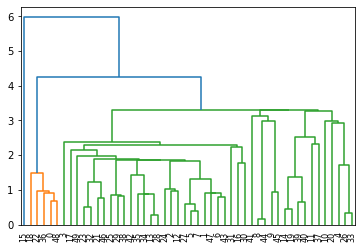

In [51]:
from scipy.spatial import distance_matrix
DM = pd.DataFrame(distance_matrix(C1.values,C1.values))
from scipy.cluster.hierarchy import dendrogram,linkage
dendrogram(linkage(DM))
plt.show()

In [52]:
C2 = A[["Trip_Distance","Customer_Rating"]]

In [53]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
model = km.fit(C2)
model.labels_

array([1, 1, 1, ..., 1, 1, 0])

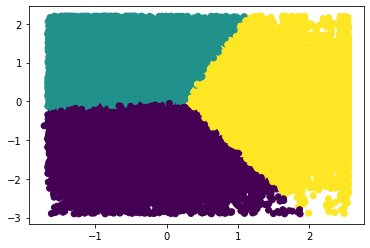

In [54]:
import matplotlib.pyplot as plt
plt.scatter(C2["Trip_Distance"],C2.Customer_Rating,c=model.labels_)

In [55]:
C2 = A[["Trip_Distance","Customer_Rating"]][0:50]

In [56]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=4)
model = agc.fit(C2)
model.labels_

array([0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 3, 1, 0, 2, 3, 0, 3, 0, 2, 1, 3, 0,
       2, 0, 0, 2, 3, 2, 0, 2, 3, 0, 0, 0, 0, 2, 2, 1, 0, 3, 3, 1, 0, 0,
       1, 1, 0, 2, 2, 0], dtype=int64)

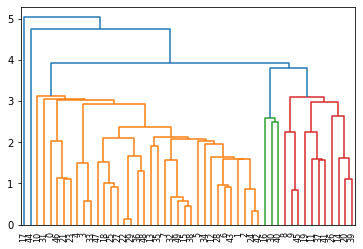

In [57]:
from scipy.spatial import distance_matrix
DM = pd.DataFrame(distance_matrix(C2.values,C2.values))
from scipy.cluster.hierarchy import dendrogram,linkage
dendrogram(linkage(DM))
plt.show()

In [58]:
C3 = A[["Life_Style_Index","Customer_Rating"]]

In [59]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
model = km.fit(C3)
model.labels_

array([3, 0, 0, ..., 2, 2, 1])

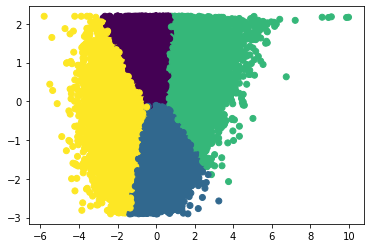

In [60]:
import matplotlib.pyplot as plt
plt.scatter(C3["Life_Style_Index"],C3.Customer_Rating,c=model.labels_)

In [61]:
C3 = A[["Life_Style_Index","Customer_Rating"]][0:50]

In [62]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=4)
model = agc.fit(C3)
model.labels_

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 3, 3, 1, 3, 0, 1, 0, 2, 0,
       1, 0, 0, 3, 2, 3, 0, 3, 3, 0, 0, 2, 3, 3, 1, 0, 0, 3, 3, 2, 0, 0,
       3, 2, 0, 3, 1, 2], dtype=int64)

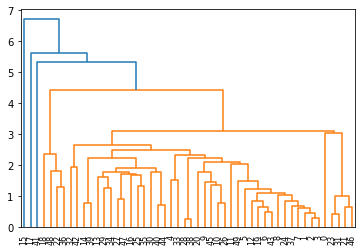

In [63]:
from scipy.spatial import distance_matrix
DM = pd.DataFrame(distance_matrix(C3.values,C3.values))
from scipy.cluster.hierarchy import dendrogram,linkage
dendrogram(linkage(DM))
plt.show()